In [1]:
import pandas as pd

In [2]:
import numpy as np # linear algebra

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [5]:
from sklearn.compose import make_column_transformer

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
import seaborn as sns

In [10]:
from sklearn.linear_model import LogisticRegression 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
import xgboost as xgb

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [15]:
df=pd.read_csv("cancer_prediction_dataset.csv")


In [16]:
df

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1
...,...,...,...,...,...,...
9995,1,89,1,0,1,0
9996,0,23,1,1,0,0
9997,1,99,0,0,1,0
9998,0,26,0,1,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Gender   10000 non-null  int64
 1   Age      10000 non-null  int64
 2   Smoking  10000 non-null  int64
 3   Fatigue  10000 non-null  int64
 4   Allergy  10000 non-null  int64
 5   Cancer   10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [18]:
df.shape

(10000, 6)

In [19]:
df.describe()

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.497500,59.318400,0.500200,0.501800,0.499900,0.096400
std,0.500019,23.908952,0.500025,0.500022,0.500025,0.295154
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,60.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,80.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.columns

Index(['Gender', 'Age', 'Smoking', 'Fatigue', 'Allergy', 'Cancer'], dtype='object')

In [21]:
df.isnull().sum()

Gender     0
Age        0
Smoking    0
Fatigue    0
Allergy    0
Cancer     0
dtype: int64

In [22]:
X=df.drop('Cancer',axis=1)

In [23]:
y=df['Cancer']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
X_train.shape

(8000, 5)

In [26]:
X_test.shape

(2000, 5)

In [27]:
# Assuming you want to scale numerical features using StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from keras.utils import to_categorical, plot_model

In [28]:
preprocessor=make_column_transformer(
    (StandardScaler(), ['Age']))

In [29]:
X_train=preprocessor.fit_transform(X_train)

In [30]:
X_test=preprocessor.fit_transform(X_test)

In [31]:
y_train=to_categorical(y_train)

In [32]:
y_test=to_categorical(y_test)

In [33]:
input_shape = [X_train.shape[1]]

In [34]:
input_shape

[1]

In [35]:
input_shape = [X_train.shape[1]]

In [36]:
input_shape

[1]

In [37]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax'),  # Two classes: cancer or not cancer
])

In [38]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Use binary crossentropy for binary classification
    metrics=['accuracy'],
)

In [39]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/200
16/16 [==============================] - 1s 11ms/step - loss: 0.8735 - accuracy: 0.5725 - val_loss: 0.6584 - val_accuracy: 0.9090
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 0.7838 - accuracy: 0.5696 - val_loss: 0.6018 - val_accuracy: 0.9090
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 0.7319 - accuracy: 0.6094 - val_loss: 0.5561 - val_accuracy: 0.9090
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.6466 - val_loss: 0.5158 - val_accuracy: 0.9090
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6527 - accuracy: 0.6877 - val_loss: 0.4771 - val_accuracy: 0.9090
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6199 - accuracy: 0.7290 - val_loss: 0.4407 - val_accuracy: 0.9090
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.7600 - val_loss: 0.4100 - val_accuracy: 0.9090
Epoch 8/200


<AxesSubplot:title={'center':'Accuracy'}>

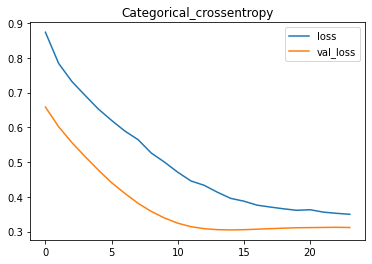

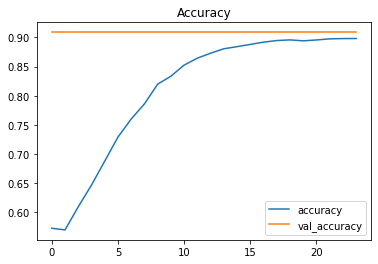

In [42]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Categorical_crossentropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [43]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 747us/step - loss: 0.3056 - accuracy: 0.9090


[0.30558615922927856, 0.9089999794960022]

# RandomForestClassifier

In [44]:
rfc=RandomForestClassifier()


In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
y_pred=rfc.predict(X_test)


In [47]:
accuracy_score(y_test,y_pred)

0.909

# KNeighborsClassifier

In [48]:
knc=KNeighborsClassifier()


In [49]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred=knc.predict(X_test)


In [51]:
accuracy_score(y_test,y_pred)

0.909

# XGBClassifier

In [52]:
xgb_i=xgb.XGBClassifier()

In [53]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
y_pred=xgb_i.predict(X_test)


In [55]:
accuracy_score(y_test,y_pred)

0.909

# DecisionTreeClassifier

In [56]:
dtc=DecisionTreeClassifier()


In [57]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=dtc.predict(X_test)


In [59]:
accuracy_score(y_test,y_pred)

0.909